# 掛載

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


read

In [ ]:
pip install pydicom

In [ ]:
from pydicom import dcmread
from pydicom.data import get_testdata_files

# 讀取 DICOM 檔案
ds = dcmread('/content/drive/MyDrive/Colab_Notebooks/data_1/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014 .dcm')

# 列出所有後設資料（metadata） -附帶的實驗相關資訊
# print(ds)

# 繪製影像

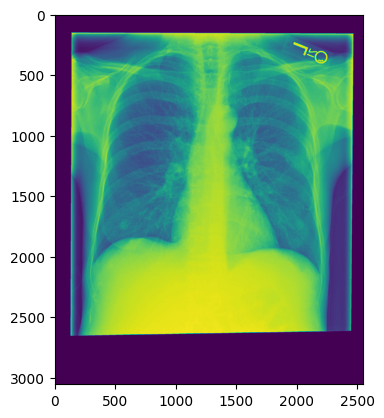

In [ ]:
import matplotlib.pyplot as plt

# 以 matplotlib 繪製影像
plt.imshow(ds.pixel_array)
plt.show()

 DICOM 檔案 轉換成 JPG 並保存到指定路徑
 圖片切割







#从float64范围[0，1]到uint8范围[0，255]的转换执行如下：uint8_val = round(float64_val*255)。
舍入操作会丢失一些数据（例如：在float64_val * 255 = 132.658的情况下，结果舍入到133）。

在保存之前将图像转换为uint8以禁止显示此警告

告诉您uint8在保存之前将图像元素转换为。

解决方法很简单。
# 乘以255，然后加.astype(np.uint8)。

In [ ]:
!pip install SimpleITK
import SimpleITK as sitk
import numpy as np
import cv2


def convert_from_dicom_to_jpg(img,low_window,high_window,save_path):
  lungwin = np.array([low_window*1.,high_window*1.])
  newimg = (img-lungwin[0])/(lungwin[1]-lungwin[0])  #归一化
  newimg = (newimg*255).astype('uint8')        #将像素值扩展到[0,255]


  cv2.imwrite(save_path, newimg, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

def split_image(src_path, rownum, colnum, file):
 img = cv2.imread(src_path)
 # cv2.imwrite(path, img)
 size = img.shape[0:2]
 w = size[1]
 h = size[0]
 row_height = h // rownum
 col_width = w // colnum
 print(file, w, h)
 # 每行的高度和每列的宽度
 num = 0
 for i in range(rownum):
      for j in range(colnum):
  # 保存切割好的图片的路径，记得要填上后缀，以及名字要处理一下，可以是
  # src_path.split('.')[0] + '_' + str((i+1)*(j+1)) + '.jpg'
        save_path = '/content/drive/MyDrive/Colab_Notebooks/data_1/new/' + file.split('.')[0] + '_' + str((i+1)+(rownum *j) ) + '.jpg'

        row_start = j * col_width
        row_end = (j+1) * col_width
        col_start = i * row_height
        col_end = (i+1) * row_height
        #print(rownum,colnum,row,col,save_path)

  # print(row_start, row_end, col_start, col_end)
        child_img = img[col_start:col_end, row_start:row_end]
        cv2.imwrite(save_path, child_img)    # cv2图片： [高， 宽]


# DICOM 檔案 轉換成 JPG + 圖片切割
if __name__ == '__main__':
    # 設定 DICOM 檔案的路徑
    dicom_file_path = '/content/drive/MyDrive/Colab_Notebooks/data_1/02aa804e-bde0afdd-112c0b34-7bc16630-4e384014 .dcm'

    # 讀取 DICOM 檔案
    ds_array = sitk.ReadImage(dicom_file_path)
    # 獲取 DICOM 圖片的 array
    img_array = sitk.GetArrayFromImage(ds_array)
    # SimpleITK读取的图像数据的坐标顺序为zyx，即从多少张切片到单张切片的宽和高，此处我们读取单张，因此img_array的shape
  #类似于 （1，height，width）的形式
    shape = img_array.shape
    img_array = np.reshape(img_array, (shape[1], shape[2])) #获取array中的height和width
    high = np.max(img_array)
    low = np.min(img_array)


    # 轉換成 JPG 並保存到指定路徑
    output_jpg_path = '/content/drive/MyDrive/Colab_Notebooks/data_1/JPG_image/lung001.jpg'
    convert_from_dicom_to_jpg(img_array, low, high, output_jpg_path)

    if __name__ == '__main__':
      # 繼續後續的圖片切割等操作
      src_path = output_jpg_path  # src_path 具体图片路径，包含后缀
      row = 10
      col = 10
      file_name = 'lung001.jpg' # 設置要處理的文件名
      split_image(src_path, row, col, file_name.split('.')[0])


lung001 2544 3056


In [ ]:
#row = 5
#col = 2
#for i in range(row):
 # for j in range(col):
  #  a = str((i+1)+(row *j) )
   # print(a)
    #https://www.jb51.net/article/249575.htm

row_height = 1528
col_width = 1272
row_start = 1528
row_end = 3056
col_start = 1272
col_end = 2544

In [ ]:
import os
import cv2
import numpy as np

# 图像文件夹路径
folder_0 = '/content/drive/MyDrive/Colab_Notebooks/data_1/0/'
folder_1 = '/content/drive/MyDrive/Colab_Notebooks/data_1/1/'

# 读取并处理图像
x_data = []

# 处理文件夹0中的图像
for filename in os.listdir(folder_0):
    img = cv2.imread(os.path.join(folder_0, filename))
    img = cv2.resize(img, (64, 64))  # 调整图像大小为模型输入大小
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 转换为灰度图像
    img = img / 255.0  # 归一化像素值
    x_data.append(img)

# 处理文件夹1中的图像
for filename in os.listdir(folder_1):
    img = cv2.imread(os.path.join(folder_1, filename))
    img = cv2.resize(img, (64, 64))  # 调整图像大小为模型输入大小
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 转换为灰度图像
    img = img / 255.0  # 归一化像素值
    x_data.append(img)

# 将图像数据转换为NumPy数组
x_data = np.array(x_data)

# 输出 x_data 的形状
print("x_data shape:", x_data.shape)


x_data shape: (100, 64, 64)


分割train test數據集

In [ ]:
y_data = 9*[0]+ 91*[1]
import numpy as np
y_data = np.array(y_data)
#print("y_data:", y_data)
all_data = []
for i in range(len(x_data)):
    all_data.append((x_data[i], y_data[i]))  #list(zip(x_data, y_data))

from sklearn.model_selection import train_test_split
train, test = train_test_split(all_data, random_state=777, train_size=0.8)

X_train = []
y_train = []
for x in train:
  X_train.append(x[0])
  y_train.append(x[1])

X_test = []
y_test = []
for x in test:
  X_test.append(x[0])
  y_test.append(x[1])

In [ ]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)


使用convolution模型，將目前切割圖片，經過分析後，在output層設2



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()

# 卷积层 #input_shape参数用于指定输入数据的形状：
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))  #灰階图，通道数为1
#最大池化层
model.add(MaxPooling2D(pool_size=(2, 2)))

# 全连接层
model.add(Dense(256, activation='relu'))

# Dropout层 随机失活 防止模型過擬合
model.add(Dropout(0.5))

# 展平层
model.add(Flatten())

# 输出层
model.add(Dense(2, activation='softmax'))  # 2个输出单元，二元分类

# 编译模型。 反向传播
model.compile(loss='sparse_categorical_crossentropy',  # 二元分类损失
              optimizer='rmsprop',
              metrics=['accuracy'])

# 输出模型结构
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 dense_7 (Dense)             (None, 31, 31, 256)       16640     
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 256)       0         
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dense_8 (Dense)             (None, 2)                 492034    
                                                      

In [ ]:
# 训练模型
model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=32)


Epoch 1/10
3/3 [==============================] - 1s 323ms/step - loss: 0.0392 - accuracy: 0.9875
Epoch 2/10
3/3 [==============================] - 1s 333ms/step - loss: 0.0429 - accuracy: 0.9875
Epoch 3/10
3/3 [==============================] - 1s 331ms/step - loss: 0.0436 - accuracy: 0.9875
Epoch 4/10
3/3 [==============================] - 1s 334ms/step - loss: 0.0402 - accuracy: 0.9875
Epoch 5/10
3/3 [==============================] - 1s 315ms/step - loss: 0.0416 - accuracy: 0.9875
Epoch 6/10
3/3 [==============================] - 1s 313ms/step - loss: 0.0415 - accuracy: 0.9875
Epoch 7/10
3/3 [==============================] - 1s 318ms/step - loss: 0.0399 - accuracy: 0.9875
Epoch 8/10
3/3 [==============================] - 1s 316ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 9/10
3/3 [==============================] - 1s 203ms/step - loss: 0.0432 - accuracy: 0.9875
Epoch 10/10
3/3 [==============================] - 1s 194ms/step - loss: 0.0399 - accuracy: 0.9875


In [ ]:
# 对模型进行评估
loss, accuracy = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 103ms/step - loss: 0.0128 - accuracy: 1.0000
